Processing C:\Users\vaish\Downloads\New folder\big train data\5000441068_frame60.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000441068_frame60.txt


Processing C:\Users\vaish\Downloads\New folder\big train data\5000952016_frame0.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000952016_frame0.txt


Processing C:\Users\vaish\Downloads\New folder\big train data\5000952016_frame120.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000952016_frame120.txt


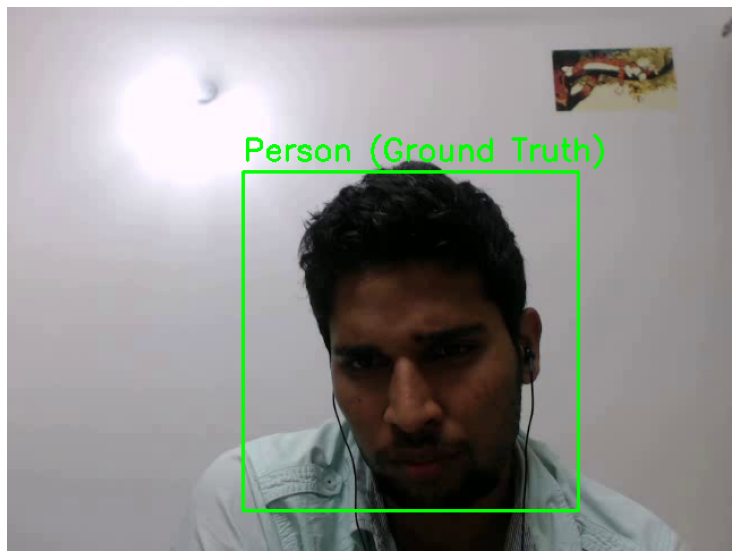

Processing C:\Users\vaish\Downloads\New folder\big train data\5000952016_frame150.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000952016_frame150.txt


Processing C:\Users\vaish\Downloads\New folder\big train data\5000952016_frame180.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000952016_frame180.txt


Processing C:\Users\vaish\Downloads\New folder\big train data\5000952016_frame210.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000952016_frame210.txt


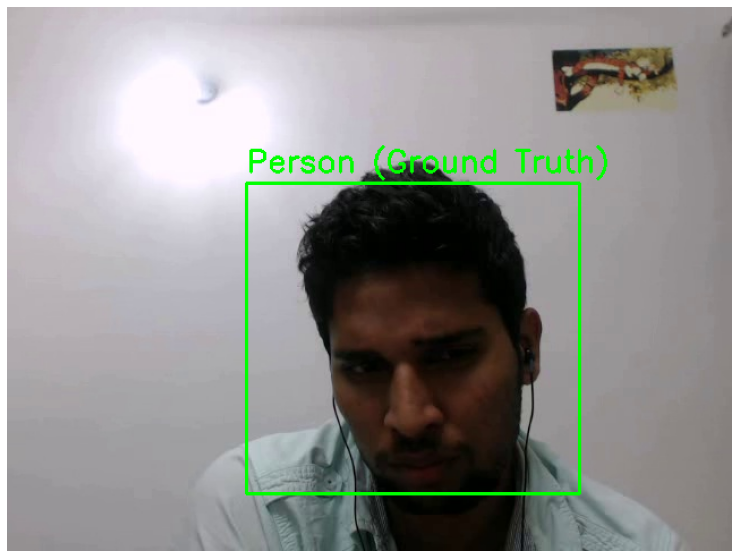

Processing C:\Users\vaish\Downloads\New folder\big train data\5000952016_frame240.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000952016_frame240.txt


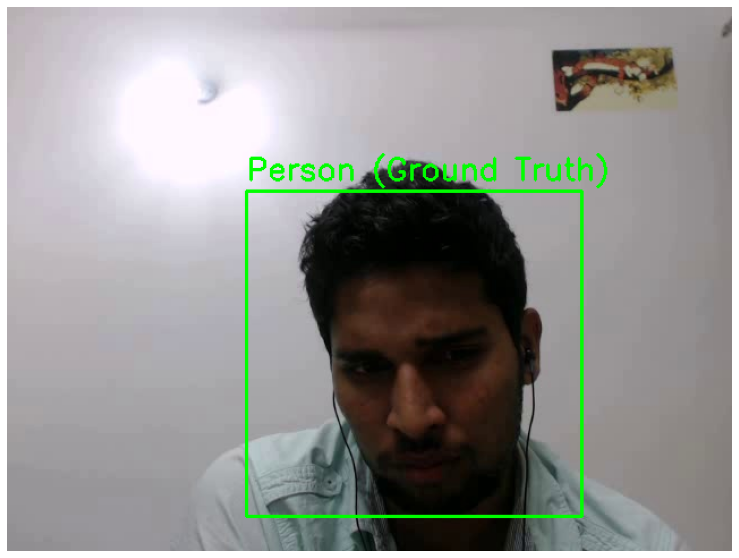

Processing C:\Users\vaish\Downloads\New folder\big train data\5000952016_frame270.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000952016_frame270.txt


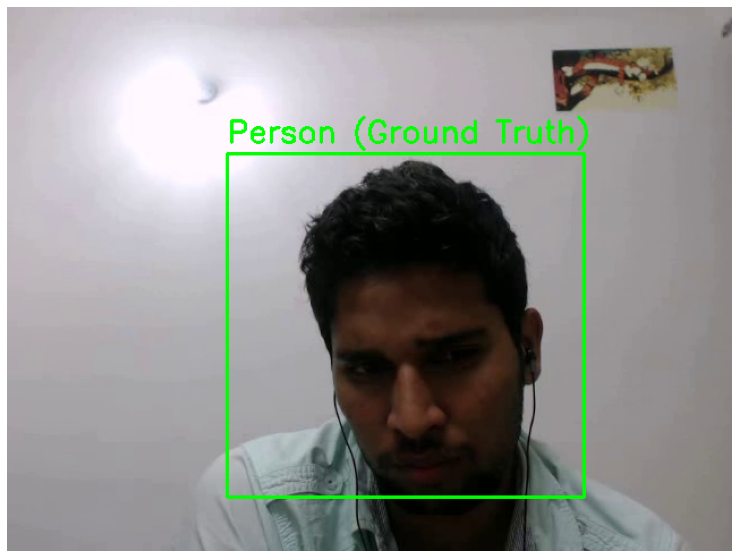

Processing C:\Users\vaish\Downloads\New folder\big train data\5000952016_frame30.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5000952016_frame30.txt


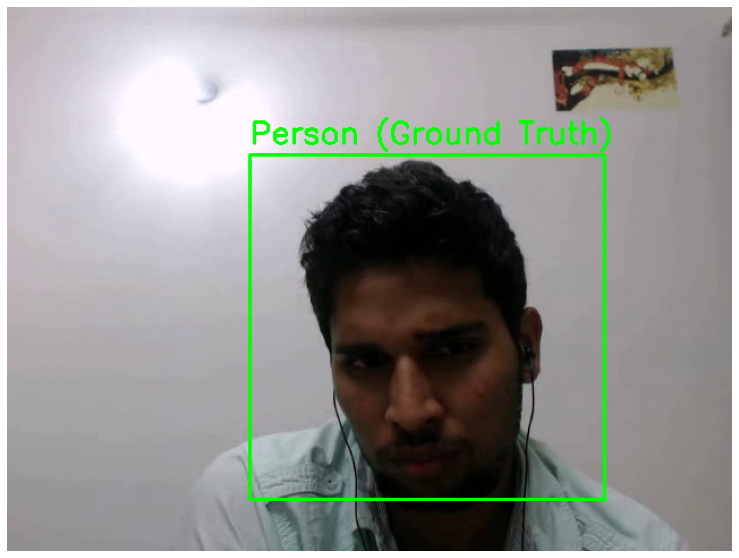

Processing C:\Users\vaish\Downloads\New folder\big train data\5100371056_frame240.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100371056_frame240.txt


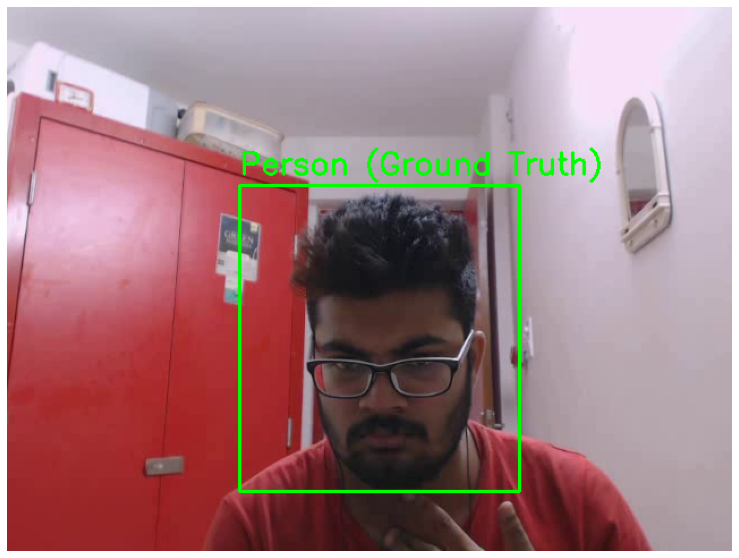

Processing C:\Users\vaish\Downloads\New folder\big train data\5100471044_frame0.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100471044_frame0.txt


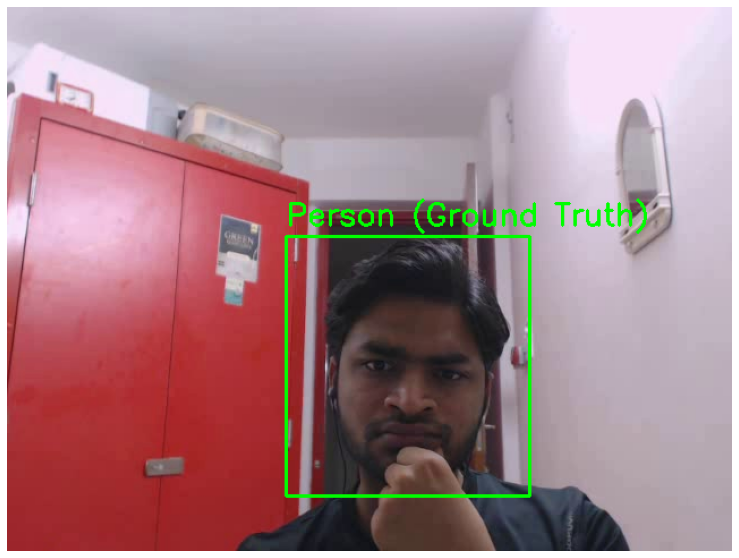

Processing C:\Users\vaish\Downloads\New folder\big train data\5100471044_frame120.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100471044_frame120.txt


Processing C:\Users\vaish\Downloads\New folder\big train data\5100471044_frame150.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100471044_frame150.txt


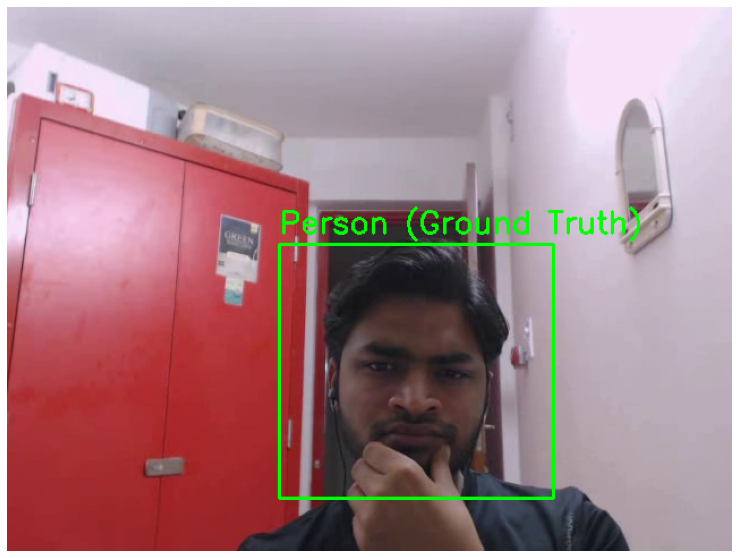

Processing C:\Users\vaish\Downloads\New folder\big train data\5100471044_frame210.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100471044_frame210.txt


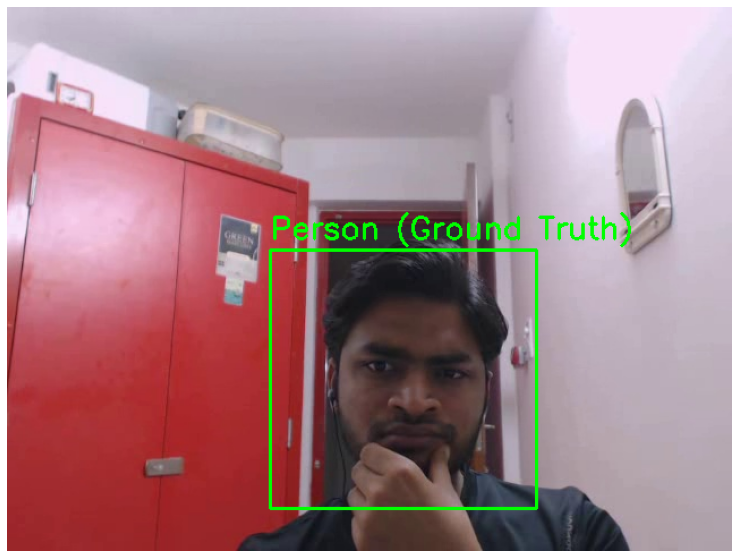

Processing C:\Users\vaish\Downloads\New folder\big train data\5100471044_frame270.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100471044_frame270.txt


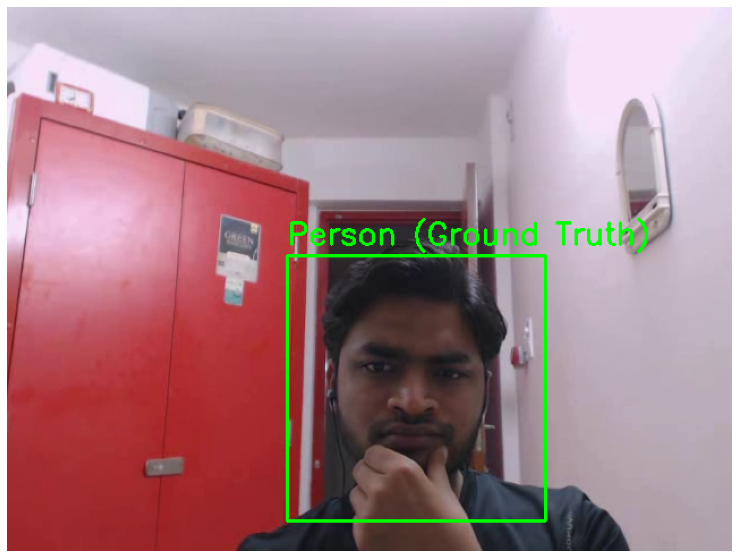

Processing C:\Users\vaish\Downloads\New folder\big train data\5100471044_frame60.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100471044_frame60.txt


Processing C:\Users\vaish\Downloads\New folder\big train data\5100471044_frame90.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100471044_frame90.txt


Processing C:\Users\vaish\Downloads\New folder\big train data\5100471059_frame120.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100471059_frame120.txt


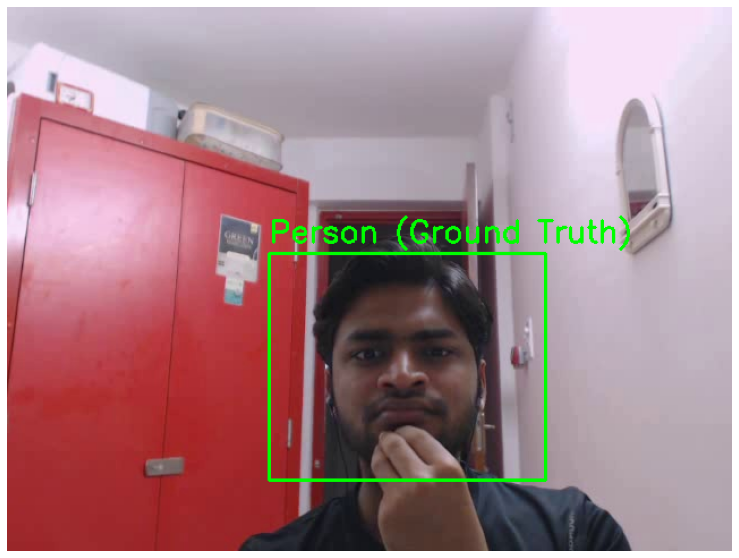

Processing C:\Users\vaish\Downloads\New folder\big train data\5100471059_frame180.jpg with labels C:\Users\vaish\Downloads\New folder\big train data\Labels\Person\5100471059_frame180.txt


In [9]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import logging

# Suppress TensorFlow warnings
logging.getLogger('tensorflow').setLevel(logging.ERROR)

# Load a pre-trained RetinaNet model from TensorFlow Hub
detector = hub.load("https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_640x640/1")

def load_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (640, 640))
    img_expanded = np.expand_dims(img_resized, axis=0)
    img_expanded = img_expanded / 255.0  # Normalize to [0,1] range
    return img, img_expanded

def detect_objects(image_expanded):
    detections = detector(image_expanded)
    return detections

def load_labels(label_path):
    bboxes = []
    with open(label_path, 'r') as file:
        labels = file.readlines()
    for line in labels:
        parts = line.strip().split()
        if len(parts) != 4:
            print(f"Invalid label format in line: {line.strip()}")
            continue
        try:
            x1, y1, x2, y2 = map(int, parts)
            bboxes.append((0, (x1, y1, x2, y2)))  # Assuming single class ID 0 for 'Person'
        except ValueError:
            print(f"Error converting label values: {parts}")
    return bboxes

def draw_bboxes(image, detections, class_names, bboxes):
    detection_boxes = detections['detection_boxes'][0].numpy()
    detection_scores = detections['detection_scores'][0].numpy()
    detection_classes = detections['detection_classes'][0].numpy().astype(int)

    # Draw RetinaNet detections
    for i in range(len(detection_scores)):
        if detection_scores[i] >= 0.5:
            class_id = detection_classes[i]
            if not (0 <= class_id < len(class_names)):
                continue
            y1, x1, y2, x2 = detection_boxes[i]
            img_height, img_width, _ = image.shape
            x1, x2, y1, y2 = int(x1 * img_width), int(x2 * img_width), int(y1 * img_height), int(y2 * img_height)
            color = (255, 0, 0)
            cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
            label = f"{class_names[class_id]}: {detection_scores[i]:.2f}"
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Draw ground truth bounding boxes
    for bbox in bboxes:
        class_id, (x1, y1, x2, y2) = bbox
        color = (0, 255, 0)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        label = f"{class_names[class_id]} (Ground Truth)"
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

def inshow(image_path, label_path, class_names):
    image, image_expanded = load_image(image_path)
    detections = detect_objects(image_expanded)
    bboxes = load_labels(label_path)
    draw_bboxes(image, detections, class_names, bboxes)
    
    # Show the image
    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

def process_folder(image_folder, label_folder, class_names):
    for root, _, files in os.walk(image_folder):
        for image_filename in files:
            if image_filename.lower().endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(root, image_filename)
                label_filename = os.path.splitext(image_filename)[0] + '.txt'
                label_path = os.path.join(label_folder, label_filename)
                
                if os.path.exists(label_path):
                    print(f"Processing {image_path} with labels {label_path}")
                    inshow(image_path, label_path, class_names)
                else:
                    print(f"No label file found for {image_path}")

# Define class names (add more as needed)
class_names = ["Person"]

# Example usage
image_folder = r"C:\Users\vaish\Downloads\New folder\big train data"
label_folder = r"C:\Users\vaish\Downloads\New folder\big train data\Labels\Person"

# Process all images in the folder
process_folder(image_folder, label_folder, class_names)
